In [2]:
import os
import csv 
import maup
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import t

In [3]:
YEAR = 2024

In [4]:
# Load and rename variables
# Washington 
shape_file = gpd.read_file('/Users/ppeaungvongpakdy/Downloads/district-shapes-wa-sl/POLYGON.shp')
shape_file['id'] = shape_file['id'].astype(int)
shape_file = shape_file.rename(columns = {'id': 'NAMELSAD'})
shape_file['NAMELSAD'] = shape_file['NAMELSAD'].apply(lambda x: f'Congressional District {x}')

#Arizona 
shape_file2 = gpd.read_file('/Users/ppeaungvongpakdy/Downloads/district-shapes-az-sl/POLYGON.shp')
shape_file2['id'] = shape_file2['id'].astype(int)
shape_file2 = shape_file2.rename(columns = {'id': 'NAMELSAD'})
shape_file2['NAMELSAD'] = shape_file2['NAMELSAD'].apply(lambda x: f'Congressional District {x}')

In [7]:
# Washington 
# Load voter data
csv_path = '/Users/ppeaungvongpakdy/Downloads/district-data-wa-sl/district-data.csv'

# Read CSV file 
df = pd.read_csv(csv_path)
df = df[['ID', 'E_22_CONG_Total', 'E_22_CONG_Dem', 'E_22_CONG_Rep']]
df = df.drop(index=0)
df['Margins'] = (df['E_22_CONG_Dem'] - df['E_22_CONG_Rep']) / df['E_22_CONG_Total']
df = df.rename(columns = {'ID': 'NAMELSAD'})
df["STATEFP"] = 53

# Voter Power Calculation
SIGMA = 5
# t-pdf setup 
deg_f = 3 
t_dist = t(deg_f)

# For sanity checking
metamargin = 0 

Z = (df['Margins'] - metamargin) / SIGMA
num = t_dist.pdf(Z)
den = df['E_22_CONG_Total']

df['Voter Power'] = np.divide(num, den)

# Renaming variables and adding data
df['NAMELSAD'] = df['NAMELSAD'].apply(lambda x: f'Congressional District {x}')
df["STATEFP"] = 53

# Merging data
df = pd.merge(df, shape_file[['NAMELSAD', 'geometry']], on = 'NAMELSAD')

##########################################################################################################################################

#Arizona
# Load voter data
csv_path = '/Users/ppeaungvongpakdy/Downloads/district-data-az-sl/district-data.csv'

# Read CSV file 
df2 = pd.read_csv(csv_path)
df2 = df2[['ID', 'E_16-20_COMP_Total', 'E_16-20_COMP_Dem', 'E_16-20_COMP_Rep']]
df2 = df2.drop(index=0)
df2['Margins'] = (df2['E_16-20_COMP_Dem'] - df2['E_16-20_COMP_Rep']) / df2['E_16-20_COMP_Total']
df2 = df2.rename(columns = {'ID': 'NAMELSAD'})
df2["STATEFP"] = 4

# Voter Power Calculation
SIGMA = 5
# t-pdf setup 
deg_f = 3 
t_dist = t(deg_f)

# For sanity checking
metamargin = 0 

Z = (df2['Margins'] - metamargin) / SIGMA
num = t_dist.pdf(Z)
den = df2['E_16-20_COMP_Total']

df2['Voter Power'] = np.divide(num, den)

# Renaming variables and adding data
df2['NAMELSAD'] = df2['NAMELSAD'].apply(lambda x: f'Congressional District {x}')
df2["STATEFP"] = 4

# Merging data
df2 = pd.merge(df2, shape_file2[['NAMELSAD', 'geometry']], on = 'NAMELSAD')

In [9]:
df2

,NAMELSAD,E_16-20_COMP_Total,E_16-20_COMP_Dem,E_16-20_COMP_Rep,Margins,STATEFP,Voter Power,geometry
0,Congressional District 1,121405,41853,77227,-0.291372,4,0.000003,"POLYGON ((-112.82422 33.99992, -112.81133 33.9..."
1,Congressional District 2,90689,42035,46620,-0.050557,4,0.000004,"POLYGON ((-112.11302 33.69234, -112.11333 33.6..."
2,Congressional District 3,131944,47958,82475,-0.261603,4,0.000003,"POLYGON ((-111.86200 34.01511, -111.87426 34.0..."
3,Congressional District 4,132485,62478,68070,-0.042209,4,0.000003,"POLYGON ((-111.89110 33.56797, -111.89083 33.5..."
4,Congressional District 5,90190,60546,27773,0.363377,4,0.000004,"POLYGON ((-112.09990 33.49505, -112.09989 33.4..."
5,Congressional District 6,90747,58363,29816,0.314578,4,0.000004,"POLYGON ((-112.82950 37.00052, -112.82946 36.9..."
6,Congressional District 7,98224,36039,60179,-0.245765,4,0.000004,"POLYGON ((-111.55207 34.77682, -111.55207 34.7..."
7,Congressional District 8,82418,50746,29608,0.256473,4,0.000004,"POLYGON ((-111.97822 33.49462, -111.98087 33.4..."
8,Congressional District 9,74712,36934,35591,0.017976,4,0.000005,"POLYGON ((-111.80801 33.45150, -111.80775 33.4..."
9,Congressional District 10,97898,36238,59498,-0.237594,4,0.000004,"POLYGON ((-111.56338 33.43683, -111.56768 33.4..."


In [10]:
df_concat_rows = pd.concat([df[['NAMELSAD', 'Margins', 'STATEFP', 'Voter Power', 'geometry']], df2[['NAMELSAD', 'Margins', 'STATEFP', 'Voter Power', 'geometry']]], axis=0)

In [11]:
df_concat_rows['Voter Power'] = ((df_concat_rows['Voter Power']  - df_concat_rows['Voter Power'].min()) / (df_concat_rows['Voter Power'].max() - df_concat_rows['Voter Power'].min()))*100

In [12]:
def round_to_nearest_tens(x):
    return round(x / 10) * 10

In [13]:
df_concat_rows['Voter Power'] = df_concat_rows['Voter Power'].apply(round_to_nearest_tens)

In [19]:
df_concat_rows.iloc[8]

NAMELSAD                                Congressional District 9
Margins                                                -0.278384
STATEFP                                                       53
Voter Power                                                   20
geometry       POLYGON ((-117.629103 47.572721, -117.632153 4...
Name: 8, dtype: object

In [15]:
# Save Data 
dir_path = os.path.dirname(os.path.realpath("__file__"))

path = os.path.join(dir_path, f'{YEAR}.stateLegislature.VoterPower.csv')
df_concat_rows.to_csv(path, index=False, float_format='%.2f')

In [26]:
csv_path = '/Users/ppeaungvongpakdy/Downloads/2024.stateLegislature.VoterPower(1).csv'
df = pd.read_csv(csv_path)

In [27]:
from shapely import wkt
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf.plot("Margins")

<Axes: >

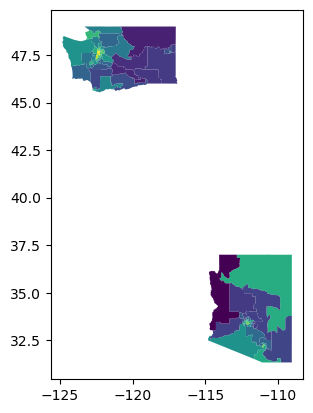

In [30]:
from shapely import wkt
gdf.plot("Margins")